<a href="https://colab.research.google.com/github/NumericalAnalysis-YTU/FIZ4610-Computational-Physics/blob/main/lab_ode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Solution of D.E.s

The numerical solution of diﬀerential equations is a very large subject spanning many types of problems and solutions. In this lecture we will look at just two simpliﬁed topics: the solution of ordinary diﬀerential equations using Euler’s method (ﬁrst-order Rung-Kutta), and the solution of partial diﬀerential equations using the ﬁnite-diﬀerence method and Jacobi Relaxation. You can read about many other types of problems and
solutions in your course text book (”Ordinary Diﬀerential Equations” and ”Partial Diﬀerential Equations”).


#The Euler Method (ﬁrst-order Rung-Kutta)

Many physical systems can be expressed in terms of ﬁrst-order or second-order diﬀerential equations. The time-evolution of these systems can be approximated with a Euler method. We will apply the Euler method
to simulate a body in free-fall, the charging and discharge of a simple R-C circuit, and the motion of a mass-on-a-spring system.
To introduce the ideas of Euler methods we will ﬁrst look at a simple ’freshman physics’ problem of a body in free-fall; here air resistance is ignored and the acceleration due to gravity is a constant $g =  9.81
m/s^2$. First the problem is solved analytically and then we will develop Euler methods to solve the problem numerically. We will then study Euler methods further.

#Free-fall - analytical solution

We will determine the displacement of a body in free-fall. The boundary conditions for the solution is that at $t=0$ the initial displacement, y, and the initial velocity, v, are both zero. The system is governed by the
second-order diﬀerential equation
 $y” = -g$ ; 
 
 integrating with the above boundary conditions gives

$y’ = - g t$ and so $y = - 0.5 g t$



For $t = 10 seconds$ 

we therefore have a displacement of 

$-0.5   x   9.81   x   10^2  = -490.500 m$



# Free-fall - numerical solution (by the Euler method)

We have the second-order diﬀerential equation $ y” = -g $ this can be written as two ﬁrst-order equations:

$\frac{dv}{dt} = -g$  and $ \frac{dy}{dt} = v $, 

rearranging these equations we have: 

$dv = -g dt$ and 

$dy = v dt$, 

which can be written as:

$v(t+dt) = v(t) - g dt $
$y(t+dt) = y(t) + v(t) dt $


These expressions simple state that the velocity a time dt later is the current velocity advanced by acceleration multiplied by dt, and the displacement a time dt later is the current displacement advanced by velocity multiplied by dt. The expressions are exact if dt takes the calculus form of "**dt tends to zero**". However, for a numerical solution dt is small but not zero; with a ﬁnite value for dt the above equations become Euler’s method, the expressions now, in general, contain truncation errors (see later).


Writing the expressions in the form of an algorithm:

$v1 = v0 - g dt $

Euler step evolving velocity and

$y1 = y0 + v0 dt $

displacement in a finite time $dt$ Three versions of the Euler step exist:


Simple Euler|       Euler-Cromer   |           Improved Euler|
--- | ---|---|
v1 = v0 - g dt  |    v1 = v0 - g dt        |   v1 = v0 - g dt|
y1 = y0 + v0 dt |    y1 = y0 + v1 dt     |    y1 = y1 + $\frac{(v0+v1)}{2}$ dt|



Each version uses a diﬀerent velocity to evolve y:


Methods       | Used           
--- | ---|
 Simple Euler | v0 - generally poor accuracy |
 Euler-Cromer   |v1 - works well for oscillating systems|  
 Improved Euler|(v0+v1)/2 - exact for the free-fall system.
 

#Euler Formula



The differential equation $\frac{df(t)}{dt}=e^{−t}$ with initial condition $f_0 = −1$ has the exact solution $f(t)=−e^{−t}$. 

Approximate the solution to this initial value problem between 0 and 1 in increments of 0.1 using the Explicity **Euler Formula**. 

Plot the difference between the approximated solution and the exact solution.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
%matplotlib inline

# Define parameters

f = lambda t, s: np.exp(-t) # ODE

h = 0.1 # Step size
t = np.arange(0, 1 + h, h) # Numerical grid
s0 = -1 # Initial Condition

# Explicit Euler Method
s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h*f(t[i], s[i])

plt.figure(figsize = (12, 8))
plt.plot(t, s, 'bo--', label='Approximate')
plt.plot(t, -np.exp(-t), 'g', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

# 2nd Order Runge Kutta
The general 2nd Order Runge Kutta method for to the first order differential equation
\begin{equation} y^{'} = f(t,y) \end{equation}
numerical approximates $y$ the at time point $t_i$ as $w_i$
with the  formula:
\begin{equation} w_{i+1}=w_i+\frac{h}{2}\big[k_1+k_2],\end{equation}
for $i=0,...,N-1$, where 
\begin{equation}k_1=f(t_i,w_i),\end{equation}
and
\begin{equation}k_2=f(t_i+h,w_i+hk_1),\end{equation}
and $h$ is the stepsize.

To illustrate the method we will apply it to three intial value problems:
## 1. Linear 
Consider the linear population Differential Equation
\begin{equation} y^{'}=0.1y, \ \ (2000 \leq t \leq 2020), \end{equation}
with the initial condition,
\begin{equation}y(2000)=6.\end{equation}

## 2. Non-Linear Population Equation 
Consider the non-linear population Differential Equation
\begin{equation} y^{'}=0.2y-0.01y^2, \ \ (2000 \leq t \leq 2020), \end{equation}
with the initial condition,
\begin{equation}y(2000)=6.\end{equation}

## 3. Non-Linear Population Equation with an oscillation 
Consider the non-linear population Differential Equation with an oscillation 
\begin{equation} y^{'}=0.2y-0.01y^2+\sin(2\pi t), \ \ (2000 \leq t \leq 2020), \end{equation}
with the initial condition,
\begin{equation}y(2000)=6.\end{equation}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
%matplotlib inline

# Define parameters

f = lambda t, s: np.cos(t) # ODE

h = 0.1 # Step size
t = np.arange(0, np.pi + h, h) # Numerical grid

s0 = -1 # Initial Condition

# Explicit Euler Method
s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h*f(t[i], s[i])

plt.figure(figsize = (12, 8))
plt.plot(t, s, 'bo--', label='Approximate')
plt.plot(t, -np.exp(-t), 'g', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [5]:
pi = 3.141592653589793
e = 2.718281828459045


# 1. Linear Population Equation
## Exact Solution 
The linear population equation
\begin{equation} y^{'}=0.1y, \ \ (2000 \leq t \leq 2020), \end{equation}
with the initial condition,
\begin{equation} y(2000)=6.\end{equation}
has a known exact (analytic) solution
\begin{equation} y=6e^{0.1(t-2000)}. \end{equation}

## Specific 2nd Order Runge Kutta 
To write the specific 2nd Order Runge Kutta method for the linear population equation we need 
\begin{equation}f(t,y)=0.1y.\end{equation}

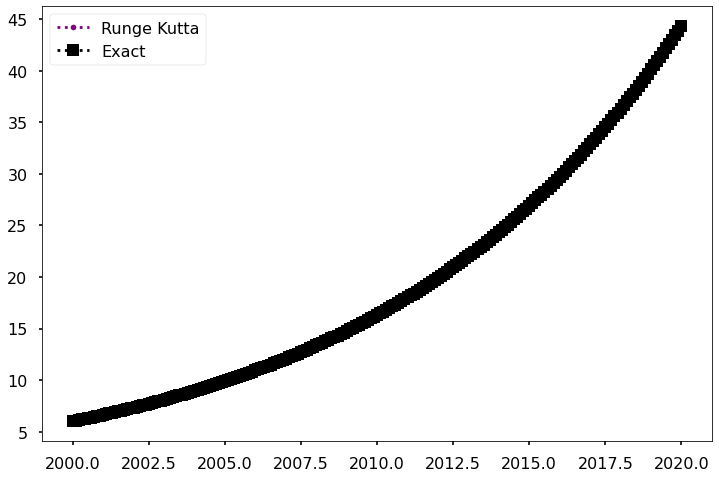

In [20]:
## Library
import numpy as np
import math 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings

warnings.filterwarnings("ignore")


def linfun(t,w):
    ftw=0.1*w
    return ftw

w=np.zeros(N+1)
w[0]=6.0
## 2nd Order Runge Kutta
for k in range (0,N):
    k1=linfun(t[k],w[k])
    k2=linfun(t[k]+h,w[k]+h*k1)
    w[k+1]=w[k]+h/2*(k1+k2)

y=6*np.exp(0.1*(t-2000))
fig = plt.figure(figsize=(12,8))
plt.plot(t,w,'.:',color='purple',label='Runge Kutta')
plt.plot(t,y,'s:',color='black',label='Exact')
plt.legend(loc='best')
plt.show()


In [21]:

d = {'time t_i': t[0:10],    'Runge Kutta':w[0:10],'Exact (y)':y[0:10],'Exact Error':np.abs(np.round(y[0:10]-w[0:10],10))}
df = pd.DataFrame(data=d)
df

,time t_i,Runge Kutta,Exact (y),Exact Error
0,2000.0,6.000000,6.000000,0.000000
1,2000.1,6.060300,6.060301,0.000001
2,2000.2,6.121206,6.121208,0.000002
3,2000.3,6.182724,6.182727,0.000003
4,2000.4,6.244861,6.244865,0.000004
5,2000.5,6.307621,6.307627,0.000005
6,2000.6,6.371013,6.371019,0.000006
7,2000.7,6.435042,6.435049,0.000007
8,2000.8,6.499714,6.499722,0.000009
9,2000.9,6.565036,6.565046,0.000010


## 2. Non-Linear Population Equation 
\begin{equation} y^{'}=0.2y-0.01y^2, \ \ (2000 \leq t \leq 2020), \end{equation}
with the initial condition,
\begin{equation}y(2000)=6.\end{equation}
## Specific 2nd Order Runge Kutta for the Non-Linear Population Equation
To write the specific 2nd Order Runge Kutta method we need
\begin{equation}f(t,y)=0.2y-0.01y^2,\end{equation}
this gives
\begin{equation}k_1=f(t_i,w_i)=0.2w_i-0.01w_i^2,\end{equation}
\begin{equation}k_2=f(t_i+h,w_i+hk_1)=0.2(w_i+hk_1)-0.01(w_i+hk_1)^2,\end{equation}
and the difference equation
\begin{equation}w_{i+1}=w_{i}+\frac{h}{2}(k_1+k_2),\end{equation}
for $i=0,...,199$, where $w_i$ is the numerical approximation of $y$ at time $t_i$, with step size $h$ and the initial condition
\begin{equation}w_0=6.\end{equation}

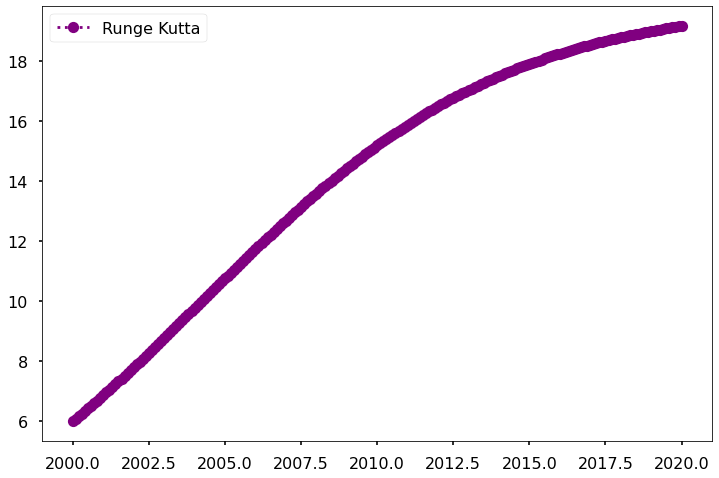

In [24]:
def nonlinfun(t,w):
    ftw=0.2*w-0.01*w*w
    return ftw


w=np.zeros(N+1)
w[0]=6.0
## 2nd Order Runge Kutta
for k in range (0,N):
    k1=nonlinfun(t[k],w[k])
    k2=nonlinfun(t[k]+h,w[k]+h*k1)
    w[k+1]=w[k]+h/2*(k1+k2)

fig = plt.figure(figsize=(12,8))
plt.plot(t,w,'o:',color='purple',label='Runge Kutta')
plt.legend(loc='best')
plt.show()

In [ ]:
d = {'time t_i': t[0:10], 
     'Runge Kutta':w[0:10]}
df = pd.DataFrame(data=d)
df

## 3. Non-Linear Population Equation with an oscilation 
\begin{equation} y^{'}=0.2y-0.01y^2+\sin(2\pi t), \ \ (2000 \leq t \leq 2020), \end{equation}
with the initial condition,
\begin{equation}y(2000)=6.\end{equation}

## Specific 2nd Order Runge Kutta for the Non-Linear Population Equation with an oscilation
To write the specific 2nd Order Runge Kutta difference equation for the intial value problem we need 
\begin{equation}f(t,y)=0.2y-0.01y^2+\sin(2\pi t),\end{equation}
which gives
\begin{equation}k_1=f(t_i,w_i)=0.2w_i-0.01w_i^2+\sin(2\pi t_i),\end{equation}
\begin{equation}k_2=f(t_i+h,w_i+hk_1)=0.2(w_i+hk_1)-0.01(w_i+hk_1)^2+\sin(2\pi (t_i+h)),\end{equation}
and the difference equation
\begin{equation}w_{i+1}=w_{i}+\frac{h}{2}(k_1+k_2),\end{equation}
for $i=0,...,199$, where $w_i$ is the numerical approximation of $y$ at time $t_i$, with step size $h$ and the initial condition
\begin{equation}w_0=6.\end{equation}

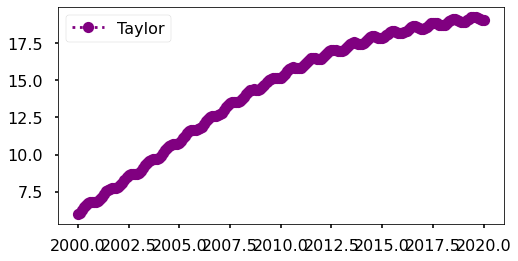

In [26]:
'''
2nd order Runge Kutta numerical approximation
'''

def nonlin_oscfun(t,w):
    ftw=0.2*w-0.01*w*w+np.sin(2*np.math.pi*t)
    return ftw


w=np.zeros(N+1)
w[0]=6.0
## 2nd Order Runge Kutta
for k in range (0,N):
    k1=nonlin_oscfun(t[k],w[k])
    k2=nonlin_oscfun(t[k]+h,w[k]+h*k1)
    w[k+1]=w[k]+h/2*(k1+k2)

fig = plt.figure(figsize=(8,4))
plt.plot(t,w,'o:',color='purple',label='Taylor')
plt.legend(loc='best')
plt.show()


# Example 4th order Runge Kutta

The general form of the population growth differential equation
\begin{equation} y^{'}=t-y, \ \ (0 \leq t \leq 2) \end{equation}
with the initial condition
\begin{equation}y(0)=1,\end{equation}
Has the exact soulation. \begin{equation} y= 2e^{-t}+t-1.\end{equation}




## Initial Setup
Defining the step size $h$ from the interval range $a\leq t \leq b$ and number of steps $N$
\begin{equation}h=\frac{b-a}{h}.\end{equation}
This gives the discrete time steps,
\begin{equation}t_{i}=t_0+ih,\end{equation}
where $t_0=a$.

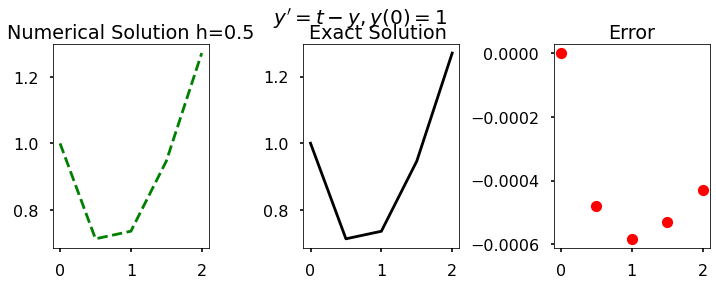

In [27]:


import numpy as np
import math 

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings

warnings.filterwarnings("ignore")


def myfun_ty(t,y):
    return t-y

# Start and end of interval
b=2
a=0
# Step size
N=4
h=(b-a)/(N)
t=np.arange(a,b+h,h)



# Initial Condition
IC=1
w=np.zeros(N+1)
y=(IC+1)*np.exp(-t)+t-1#np.zeros(N+1)
w[0]=IC

# 4th Order Runge Kutta


for k in range (0,N):
    k1=myfun_ty(t[k],w[k])
    k2=myfun_ty(t[k]+h/2,w[k]+h/2*k1)
    k3=myfun_ty(t[k]+h/2,w[k]+h/2*k2)
    k4=myfun_ty(t[k]+h,w[k]+h*k3)
    w[k+1]=w[k]+h/6*(k1+2*k2+2*k3+k4)


fig = plt.figure(figsize=(10,4))
# --- left hand plot
ax = fig.add_subplot(1,3,1)
plt.plot(t,w, '--',color='green')
#ax.legend(loc='best')
plt.title('Numerical Solution h=%s'%(h))

ax = fig.add_subplot(1,3,2)
plt.plot(t,y,color='black')
plt.title('Exact Solution ')

ax = fig.add_subplot(1,3,3)
plt.plot(t,y-w, 'o',color='red')
plt.title('Error')
# --- title, explanatory text and save
fig.suptitle(r"$y'=t-y,   y(0)=%s$"%(IC), fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.85)  


What is ODE - PDE – nonlinear ODE linear ODE?

# Task 1: 

The differential equation  $\frac{df(t)}{dt}=e^{−t}$  with initial condition  $f_0 = −1 $  has the exact solution  $f(t)=−e^{−t}$.


Change h step size from $1.0$ to $1e^{-3}$ to see results.


# Task 2

Change the function as  $f(x)= Cos(x)$ x changes from 0 to pi. 


# Task 3

Write a computer program to solve free fall problem. 